In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter

pd.set_option('display.max_columns', 500)


%matplotlib inline
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)



# TP 4: Bank Churn

### Contexto

El presente, es un dataset que contiene información de clientes de un banco, teniendo como objetivo de análisis o target definir si éstos abandonarán o no el banco.

Entre las features del dataset, encontramos: 

- **RowNumber:** será eliminada ya que es redundante con el index.
- **CustomerId:** será eliminada ya que es no aporta información al análisis.
- **Surename:** será eliminada ya que no aporta información al análisis.
- **CreditScore:** score referente a la solvencia del cliente al momento de devolver préstamos. Mientras más alto sea el Score, mejor reputación tendrá el prestatario frente a los prestamistas
- **Geography:** País del cliente.
- **Gender:** Género del cliente.
- **Age:** Edad del cliente.
- **Tenure:** Cantidad de tiempo (en años) otorgado para reembolsar el préstamo.
- **Balance:** Cantidad neta de dinero luego de sumar y restar todos los débitos y los créditos del cliente.
- **NumOfProducts:** Cantidad de productos del banco que el cliente posee
- **HasCrCard:** Si el cliente tiene o no tarjeta de crédito.
- **IsActiveMember:** Si el cliente es o no un miembro activo.
- **EstimatedSalary:** Salario estimado del cliente.
- **Exited:** Si el cliente se fue o no del banco. Es nuestra variable **TARGET**.

In [2]:
path = "./Bank/Churn Modeling.csv"

df = pd.read_csv(path, skipinitialspace=True, skip_blank_lines=False)
df.head(3)



RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

In [3]:
df.drop(["RowNumber","CustomerId","Surname"],inplace=True,axis=1)

In [4]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1

In [5]:
print("Cantidad de filas: ",df.shape[0], "Cantidad de columnas: ",df.shape[1])

Cantidad de filas:  10000 Cantidad de columnas:  11


In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

### Nulos

In [9]:
print("Cantidad de instancias nulas por columna: ")
print(df.isnull().sum())

print("% de instancias nulas por columna: ")
print(df.isnull().mean())

Cantidad de instancias nulas por columna: 
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
% de instancias nulas por columna: 
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


A primera vista, no parece haber valores nulos en el dataset.

## Conocimiento de features

In [10]:
categorical_columns = [col for col in df.columns if df[col].dtypes == 'object']
print(len(categorical_columns),"columnas son categoricas")
categorical_columns

2 columnas son categoricas


['Geography', 'Gender']

In [11]:
non_categorical_columns = [col for col in df.columns if df[col].dtypes != 'object']
print(len(non_categorical_columns),"columnas no son categoricas")
non_categorical_columns

9 columnas no son categoricas


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## EDA (Exploratory Data Analysis)

### Distribucion de variable target

Nuestra variable target será la columna "Exited", que hace referencia al retiro o no del cliente.

In [12]:
print("Distribución de la variable target: ")
print(df.Exited.value_counts())
print("Distribución de la variable target en %: ")
print(df.Exited.value_counts()/df.Exited.count())
target_distrib=df.Exited.value_counts()/df.Exited.count()

Distribución de la variable target: 
0    7963
1    2037
Name: Exited, dtype: int64
Distribución de la variable target en %: 
0    0.7963
1    0.2037
Name: Exited, dtype: float64


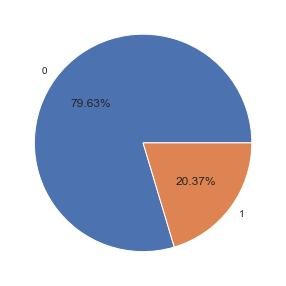

In [13]:
labels= target_distrib.index

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(target_distrib, labels = labels ,autopct='%1.2f%%')
plt.show()

0 (cero) representa a los clientes que no se fueron. 1 (uno), a los clientes que si se fueron. Si bien no es de manera exagerada, nuestra variable target esta desbalanceada: 79.63% de los clientes no salieron, el restante 20.37% si.

### CreditScore

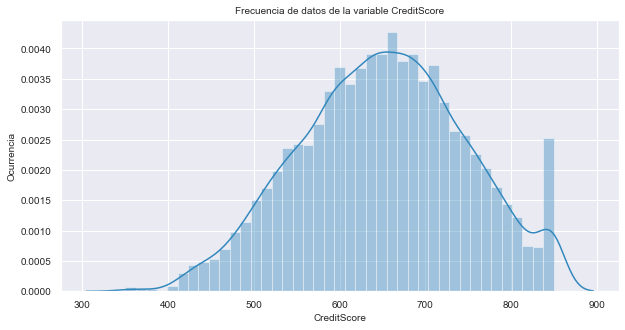

In [14]:
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

sns.distplot(df['CreditScore'],color='#3288bd')
ax.set_xlabel('CreditScore', fontsize=10)
ax.set_ylabel('Ocurrencia', fontsize=10)
ax.set_title('Frecuencia de datos de la variable CreditScore', fontsize=10)
ax.tick_params(labelsize=10)

In [15]:
ranges=[-1,400,600,800,1000]
labels= ["Under 400","401-600","601-800","Over 800"]

df["credit_score_range"]=pd.cut(df['CreditScore'],bins= ranges,labels=labels)

In [16]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited credit_score_range  
0          1               1        101348.88       1            601-800  
1          0               1        112542.58       0            601-800  
2          1               0        113931.57       1            401-600

### Geography

In [17]:
country=df.Geography.value_counts()

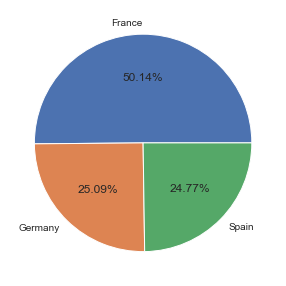

In [18]:
labels= country.index

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(country, labels = labels ,autopct='%1.2f%%')
plt.show()

Vemos que el 50% de los clientes provienen de Francia, mientras que el resto estan distribuidos en partes casi iguales entre Alemania y España.

### Gender

In [19]:
gender=df.Gender.value_counts()

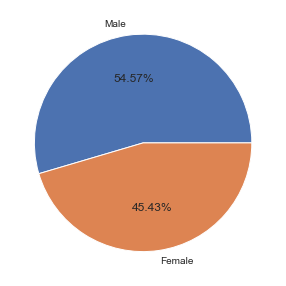

In [20]:
labels= gender.index

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(gender, labels = labels ,autopct='%1.2f%%')
plt.show()

### Age

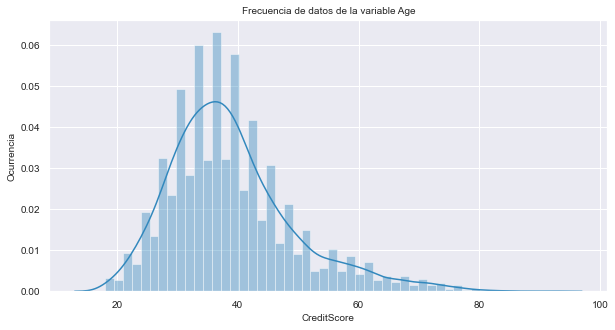

In [21]:
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

sns.distplot(df['Age'],color='#3288bd')
ax.set_xlabel('CreditScore', fontsize=10)
ax.set_ylabel('Ocurrencia', fontsize=10)
ax.set_title('Frecuencia de datos de la variable Age', fontsize=10)
ax.tick_params(labelsize=10)

In [22]:
ranges=[0,30,40,50,100]
labels= ["Under 30","31-40","41-50","Over 51"]

df["age_range"]=pd.cut(df['Age'],bins= ranges,labels=labels)

age_range=df["age_range"].value_counts()

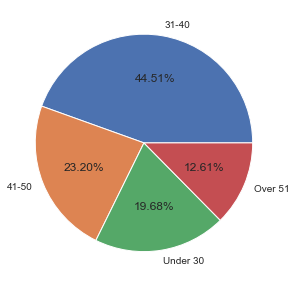

In [23]:
labels= age_range.index

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(age_range, labels = labels ,autopct='%1.2f%%')
plt.show()

El 44.51% de los clientes tienen entre 31 y 40 años. 23.2% tienen entre 41 y 50 años.

### Tenure

In [24]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

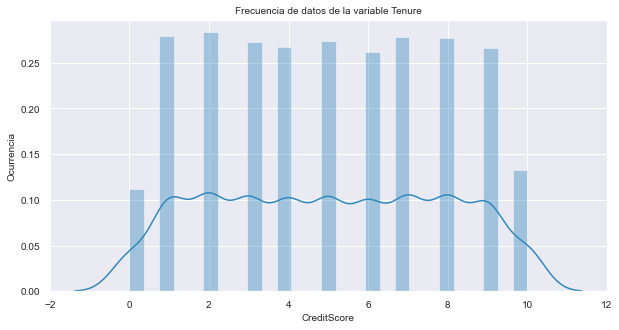

In [25]:
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

sns.distplot(df['Tenure'],color='#3288bd')
ax.set_xlabel('CreditScore', fontsize=10)
ax.set_ylabel('Ocurrencia', fontsize=10)
ax.set_title('Frecuencia de datos de la variable Tenure', fontsize=10)
ax.tick_params(labelsize=10)

### Balance

In [26]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited credit_score_range  \
0          1               1        101348.88       1            601-800   
1          0               1        112542.58       0            601-800   
2          1               0        113931.57       1            401-600   

  age_range  
0     41-50  
1     41-50  
2     41-50

In [27]:
ranges=[-1,50000,100000,150000,200000]
labels= ["Under 50000","100001-150000","150001-200000","Over 20000"]

df["balance_range"]=pd.cut(df['Balance'],bins= ranges,labels=labels)

In [28]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited credit_score_range  \
0          1               1        101348.88       1            601-800   
1          0               1        112542.58       0            601-800   
2          1               0        113931.57       1            401-600   

  age_range  balance_range  
0     41-50    Under 50000  
1     41-50  100001-150000  
2     41-50     Over 20000

In [29]:
balance_range=df.balance_range.value_counts()
balance_range

150001-200000    3830
Under 50000      3692
100001-150000    1509
Over 20000        935
Name: balance_range, dtype: int64

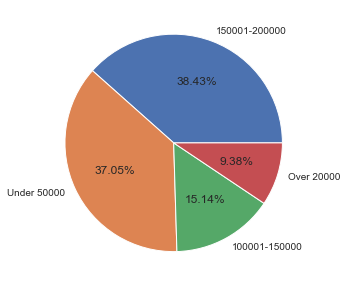

In [30]:
labels= balance_range.index

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(balance_range, labels = labels ,autopct='%1.2f%%')
plt.show()

Vemos que la gran mayoría de los clientes (38.43% ), tienen un balance en el banco de entre 150000 y 200000. No nos deje engañar el primer intervalo, ya que el porcentaje tan elevado corresponde a un gran grueso de clientes (3617) que tienen un balance de $0.

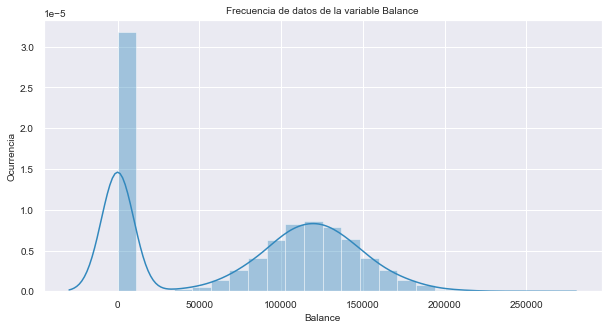

In [31]:
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

sns.distplot(df['Balance'],color='#3288bd')
ax.set_xlabel('Balance', fontsize=10)
ax.set_ylabel('Ocurrencia', fontsize=10)
ax.set_title('Frecuencia de datos de la variable Balance', fontsize=10)
ax.tick_params(labelsize=10)

In [32]:
print("Instancias totales: ",df.shape[0])
print("Instancias con balance mayor a 0.0: ",(df[df.Balance > 0.0]).shape[0])
print("Instancias con balance igual a 0.0: ",(df[df.Balance == 0.0]).shape[0])

Instancias totales:  10000
Instancias con balance mayor a 0.0:  6383
Instancias con balance igual a 0.0:  3617


Notemos que hay mucha gente (3617 de 10000) que poseen un balance igual a 0. Habra que analizar si los tratamos como outliers, o realmente existe esta cantidad de gente sin balance.

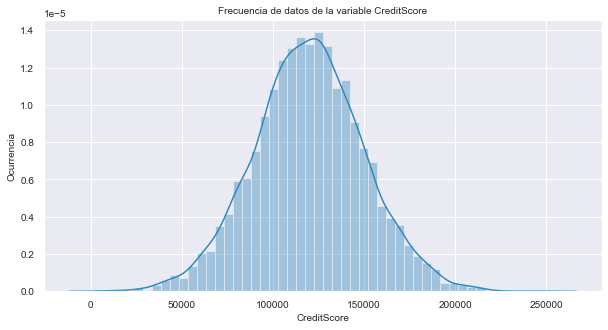

In [33]:
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

sns.distplot(df.Balance[df.Balance > 0.0],color='#3288bd')
ax.set_xlabel('CreditScore', fontsize=10)
ax.set_ylabel('Ocurrencia', fontsize=10)
ax.set_title('Frecuencia de datos de la variable CreditScore', fontsize=10)
ax.tick_params(labelsize=10)

### NumOfProducts, HasCrCard and IsActiveMember

NumOfProducts distribution


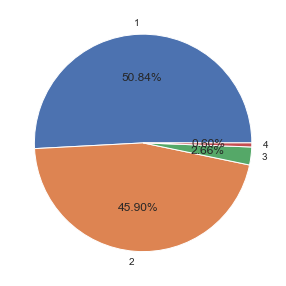

In [34]:
print("NumOfProducts distribution")

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

labels=list(set(df.NumOfProducts.unique()))
ax.pie(df.NumOfProducts.value_counts(), labels = labels ,autopct='%1.2f%%')
plt.show()

HasCrCard distribution


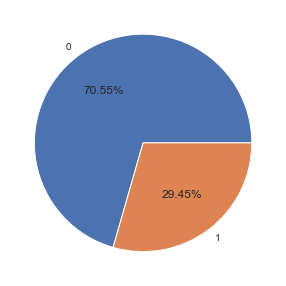

In [35]:
print("HasCrCard distribution")

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

labels_1=list(set(df.HasCrCard.unique()))
ax.pie(df.HasCrCard.value_counts(), labels = labels_1 ,autopct='%1.2f%%')
plt.show()

IsActiveMember distribution


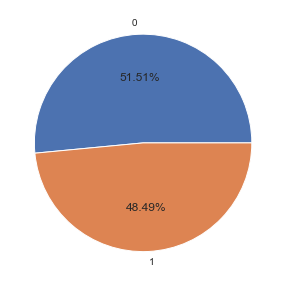

In [36]:
print("IsActiveMember distribution")

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

labels_2=list(set(df.IsActiveMember.unique()))
ax.pie(df.IsActiveMember.value_counts(), labels = labels_2 ,autopct='%1.2f%%')
plt.show()

### EstimatedSalary

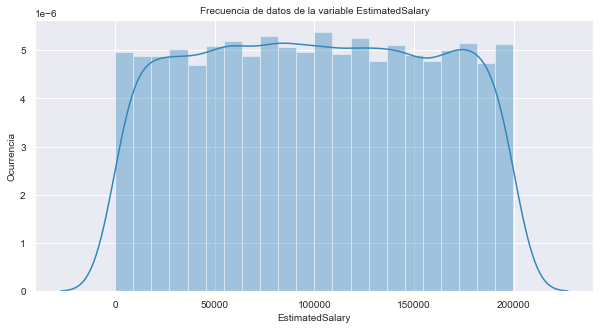

In [37]:
fig = plt.figure(figsize=(10,5)); ax = plt.axes()

sns.distplot(df['EstimatedSalary'],color='#3288bd')
ax.set_xlabel('EstimatedSalary', fontsize=10)
ax.set_ylabel('Ocurrencia', fontsize=10)
ax.set_title('Frecuencia de datos de la variable EstimatedSalary', fontsize=10)
ax.tick_params(labelsize=10)

In [38]:
ranges=[-1,50000,100000,150000,200000]
labels= ["Under 50000","100001-150000","150001-200000","Over 20000"]

df["salary_range"]=pd.cut(df['EstimatedSalary'],bins= ranges,labels=labels)

In [39]:
df.salary_range.value_counts()

150001-200000    2555
100001-150000    2537
Over 20000       2455
Under 50000      2453
Name: salary_range, dtype: int64

## Analisis bivariable: con target "Exited"

### CreditScore

In [40]:
paleta = ["#fc8d59","#3288bd"]
yes_df = df[df['Exited'] == 1]
no_df = df[df['Exited'] == 0]

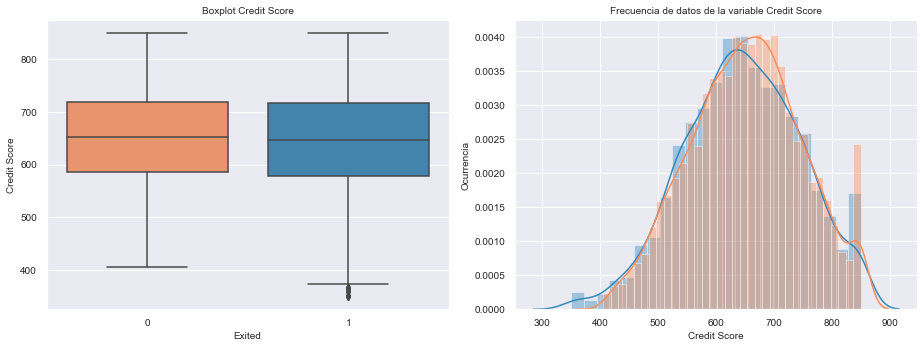

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))


sns.boxplot(y='CreditScore', x='Exited', data=df, palette=paleta, ax = ax1)
ax1.set_xlabel('Exited', fontsize=10)
ax1.set_ylabel('Credit Score', fontsize=10)
ax1.set_title('Boxplot Credit Score', fontsize=10)
ax1.tick_params(labelsize=10)


sns.distplot(yes_df['CreditScore'],color='#3288bd', ax = ax2)
sns.distplot(no_df['CreditScore'],color = '#fc8d59', ax = ax2) 
ax2.set_xlabel('Credit Score', fontsize=10)
ax2.set_ylabel('Ocurrencia', fontsize=10)
ax2.set_title('Frecuencia de datos de la variable Credit Score', fontsize=10)
ax2.tick_params(labelsize=10)



plt.subplots_adjust(wspace=0.5)

plt.tight_layout() 

In [42]:
cross_tab_score = pd.crosstab(df['Exited'],df["credit_score_range"]).apply(lambda x: x/x.sum() * 100)
cross_tab_score = cross_tab_score.transpose()
cross_tab_score

Exited                      0           1
credit_score_range                       
Under 400            0.000000  100.000000
401-600             78.798819   21.201181
601-800             80.203530   19.796470
Over 800            80.310078   19.689922

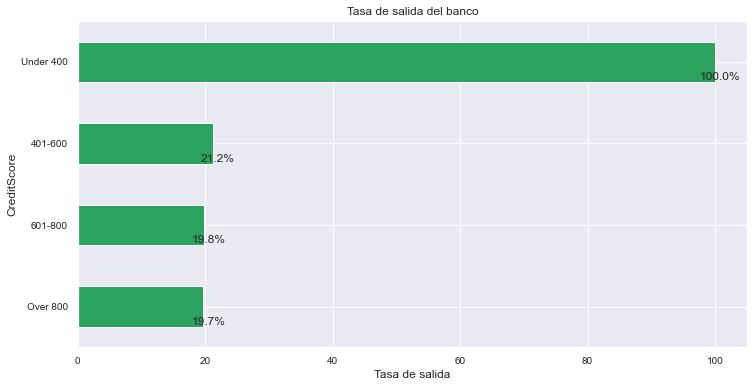

In [43]:
credit_score = cross_tab_score[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('CreditScore')

# Por estas funciones prefiero ggplot
for rec, label in zip(credit_score.patches,
                      cross_tab_score[1].sort_values(ascending = True).round(1).astype(str)):
    credit_score.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Geography

In [44]:
cross_tab_geo = pd.crosstab(df['Exited'],df["Geography"]).apply(lambda x: x/x.sum() * 100)
cross_tab_geo = cross_tab_geo.transpose()
cross_tab_geo

Exited             0          1
Geography                      
France     83.845233  16.154767
Germany    67.556796  32.443204
Spain      83.326605  16.673395

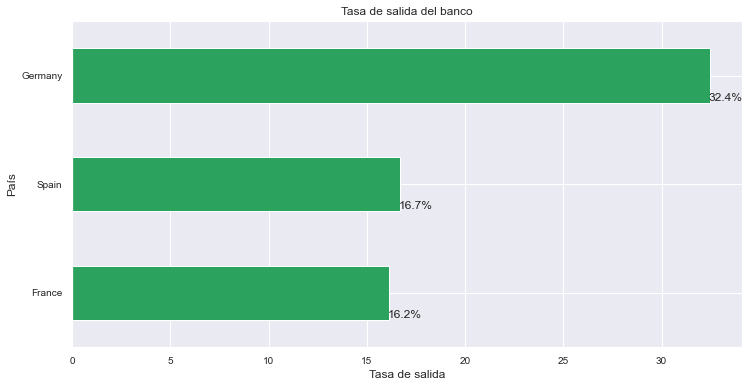

In [45]:
geo = cross_tab_geo[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('País')

# Por estas funciones prefiero ggplot
for rec, label in zip(geo.patches,
                      cross_tab_geo[1].sort_values(ascending = True).round(1).astype(str)):
    geo.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Gender

In [46]:
cross_tab_gender = pd.crosstab(df['Exited'],df["Gender"]).apply(lambda x: x/x.sum() * 100)
cross_tab_gender = cross_tab_gender.transpose()
cross_tab_gender

Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.544072  16.455928

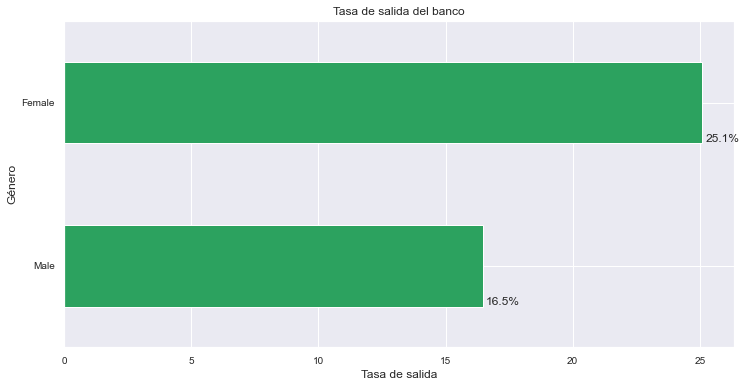

In [47]:
gender = cross_tab_gender[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('Género')

# Por estas funciones prefiero ggplot
for rec, label in zip(gender.patches,
                      cross_tab_gender[1].sort_values(ascending = True).round(1).astype(str)):
    gender.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Age

In [48]:
cross_tab_age = pd.crosstab(df['Exited'],df["age_range"]).apply(lambda x: x/x.sum() * 100)
cross_tab_age = cross_tab_age.transpose()
cross_tab_age

Exited             0          1
age_range                      
Under 30   92.479675   7.520325
31-40      87.912829  12.087171
41-50      66.034483  33.965517
Over 51    55.352895  44.647105

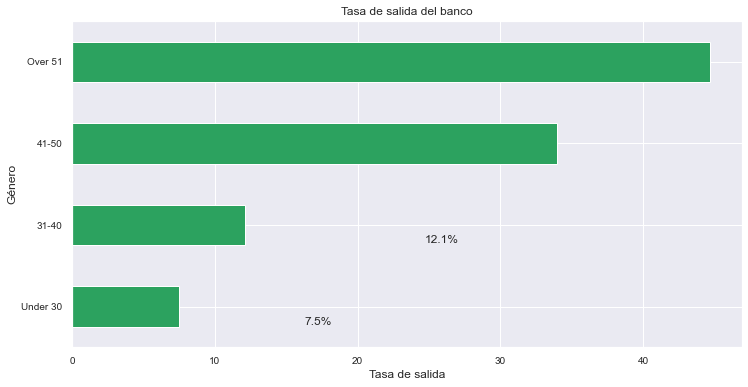

In [49]:
age = cross_tab_age[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('Género')

# Por estas funciones prefiero ggplot
for rec, label in zip(gender.patches,
                      cross_tab_age[1].sort_values(ascending = True).round(1).astype(str)):
    age.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Tenure

In [50]:
cross_tab_tenure = pd.crosstab(df['Exited'],df["Tenure"]).apply(lambda x: x/x.sum() * 100)
cross_tab_tenure = cross_tab_tenure.transpose()
cross_tab_tenure

Exited          0          1
Tenure                      
0       76.997579  23.002421
1       77.584541  22.415459
2       80.820611  19.179389
3       78.889990  21.110010
4       79.474216  20.525784
5       79.347826  20.652174
6       79.731127  20.268873
7       82.782101  17.217899
8       80.780488  19.219512
9       78.353659  21.646341
10      79.387755  20.612245

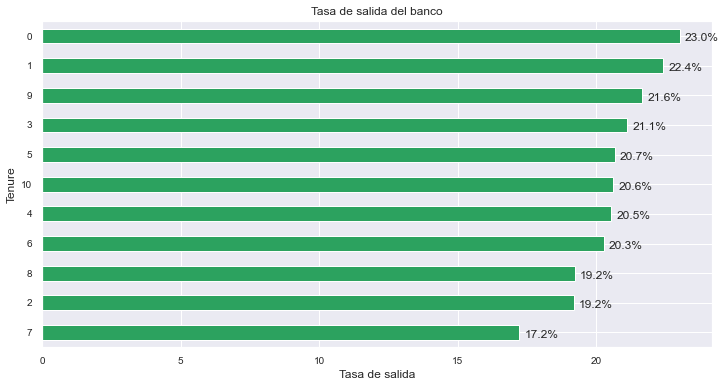

In [51]:
tenure = cross_tab_tenure[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('Tenure')

# Por estas funciones prefiero ggplot
for rec, label in zip(tenure.patches,
                      cross_tab_tenure[1].sort_values(ascending = True).round(1).astype(str)):
    tenure.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Balance

In [52]:
paleta = ["#fc8d59","#3288bd"]
yes_df = df[df['Exited'] == 1]
no_df = df[df['Exited'] == 0]

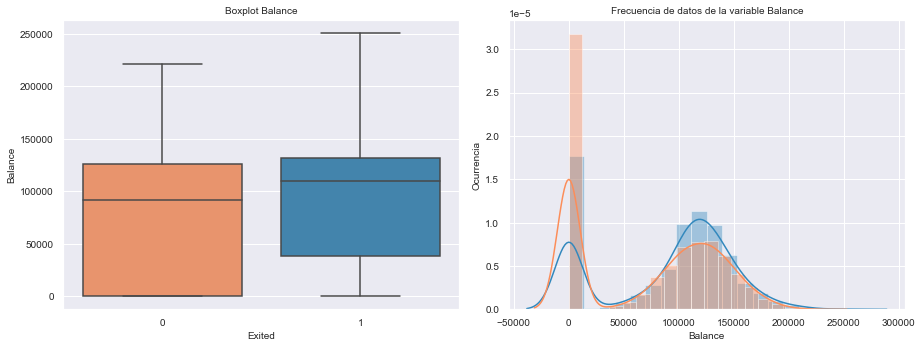

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))


sns.boxplot(y='Balance', x='Exited', data=df, palette=paleta, ax = ax1)
ax1.set_xlabel('Exited', fontsize=10)
ax1.set_ylabel('Balance', fontsize=10)
ax1.set_title('Boxplot Balance', fontsize=10)
ax1.tick_params(labelsize=10)


sns.distplot(yes_df['Balance'],color='#3288bd', ax = ax2)
sns.distplot(no_df['Balance'],color = '#fc8d59', ax = ax2) 
ax2.set_xlabel('Balance', fontsize=10)
ax2.set_ylabel('Ocurrencia', fontsize=10)
ax2.set_title('Frecuencia de datos de la variable Balance', fontsize=10)
ax2.tick_params(labelsize=10)



plt.subplots_adjust(wspace=0.5)

plt.tight_layout() 

In [54]:
cross_tab_balance = pd.crosstab(df['Exited'],df["balance_range"]).apply(lambda x: x/x.sum() * 100)
cross_tab_balance = cross_tab_balance.transpose()
cross_tab_balance

Exited                 0          1
balance_range                      
Under 50000    85.752979  14.247021
100001-150000  80.119284  19.880716
150001-200000  74.229765  25.770235
Over 20000     78.074866  21.925134

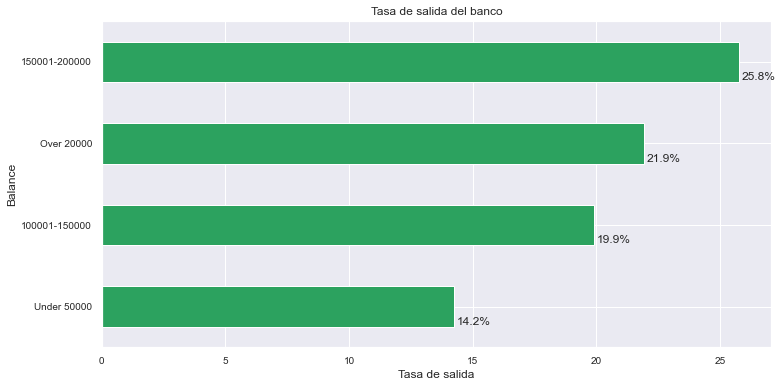

In [55]:
balance = cross_tab_balance[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('Balance')

# Por estas funciones prefiero ggplot
for rec, label in zip(balance.patches,
                      cross_tab_balance[1].sort_values(ascending = True).round(1).astype(str)):
    balance.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### NumOfProducts

In [56]:
cross_tab_num = pd.crosstab(df['Exited'],df["NumOfProducts"]).apply(lambda x: x/x.sum() * 100)
cross_tab_num = cross_tab_num.transpose()
cross_tab_num

Exited                 0           1
NumOfProducts                       
1              72.285602   27.714398
2              92.418301    7.581699
3              17.293233   82.706767
4               0.000000  100.000000

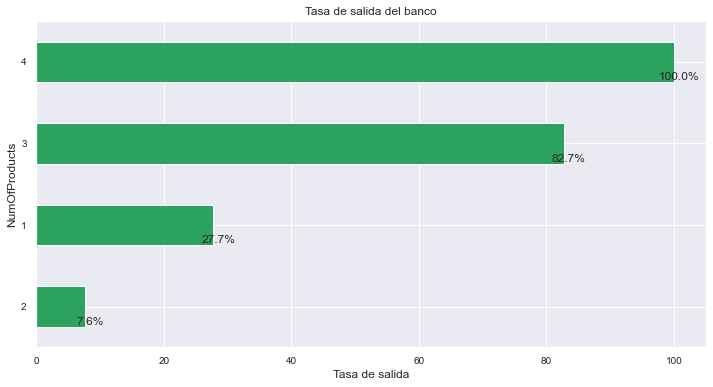

In [57]:
num = cross_tab_num[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('NumOfProducts')

# Por estas funciones prefiero ggplot
for rec, label in zip(num.patches,
                      cross_tab_num[1].sort_values(ascending = True).round(1).astype(str)):
    num.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### HasCrCard

In [58]:
cross_tab_credit = pd.crosstab(df['Exited'],df["HasCrCard"]).apply(lambda x: x/x.sum() * 100)
cross_tab_credit = cross_tab_credit.transpose()
cross_tab_credit

Exited             0          1
HasCrCard                      
0          79.185059  20.814941
1          79.815734  20.184266

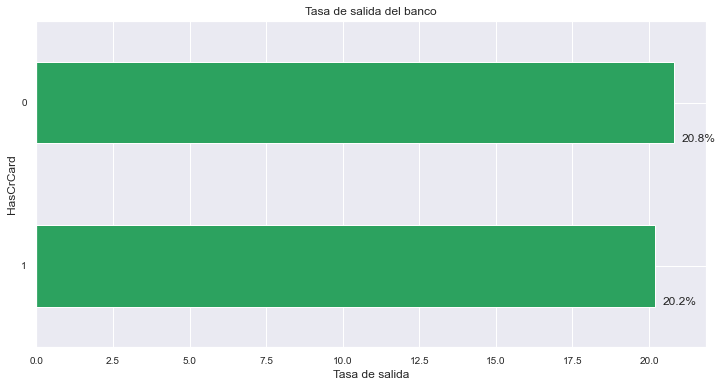

In [59]:
credit = cross_tab_credit[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('HasCrCard')

# Por estas funciones prefiero ggplot
for rec, label in zip(credit.patches,
                      cross_tab_credit[1].sort_values(ascending = True).round(1).astype(str)):
    credit.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### IsActiveMember

In [60]:
cross_tab_member = pd.crosstab(df['Exited'],df["IsActiveMember"]).apply(lambda x: x/x.sum() * 100)
cross_tab_member = cross_tab_member.transpose()
cross_tab_member

Exited                  0          1
IsActiveMember                      
0               73.149103  26.850897
1               85.730926  14.269074

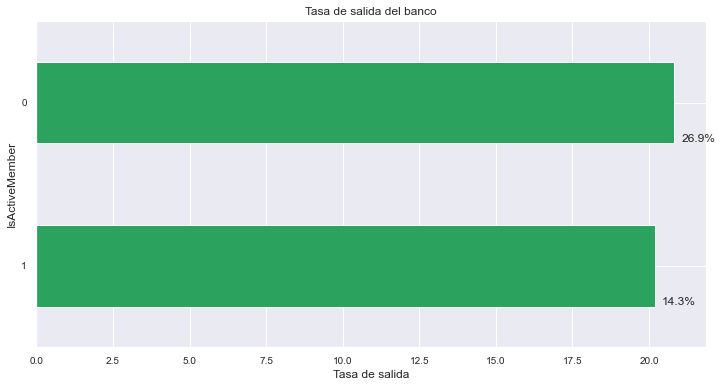

In [61]:
member = cross_tab_credit[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('IsActiveMember')

# Por estas funciones prefiero ggplot
for rec, label in zip(member.patches,
                      cross_tab_member[1].sort_values(ascending = True).round(1).astype(str)):
    member.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### EstimatedSalary

In [62]:
cross_tab_salary = pd.crosstab(df['Exited'],df["salary_range"]).apply(lambda x: x/x.sum() * 100)
cross_tab_salary = cross_tab_salary.transpose()
cross_tab_salary

Exited                 0          1
salary_range                       
Under 50000    80.065226  19.934774
100001-150000  80.134017  19.865983
150001-200000  79.765166  20.234834
Over 20000     78.533605  21.466395

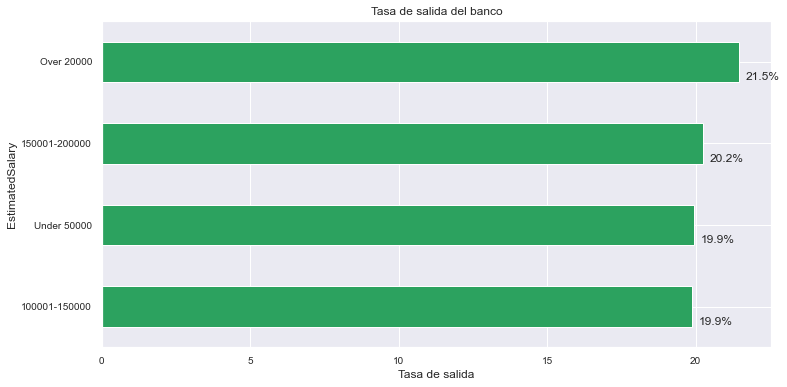

In [63]:
salary = cross_tab_salary[1].sort_values(ascending = True).plot(kind ='barh', color = "#2ca25f",
                                                                           figsize = (12,6))
                                                                               
plt.title('Tasa de salida del banco')
plt.xlabel('Tasa de salida')
plt.ylabel('EstimatedSalary')

# Por estas funciones prefiero ggplot
for rec, label in zip(salary.patches,
                      cross_tab_salary[1].sort_values(ascending = True).round(1).astype(str)):
    salary.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

## Eliminación de features que no se usarán

In [64]:
df.drop(["age_range","balance_range","salary_range","credit_score_range"],axis=1,inplace=True)

In [65]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1

## Preparando los pipelines

In [66]:
#Importamos todo para hacer los pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_union, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression

In [67]:
class ColumnSelector(BaseEstimator, TransformerMixin): #Una clase para seleccionar features
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, *_):
        return self
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Se esperaba un dataframe de pandas")

In [68]:
#Probamos si funciona
cs = ColumnSelector(["Age", "Exited", "Tenure"])
cs.transform(df).head()



Age  Exited  Tenure
0   42       1       2
1   41       0       1
2   42       1       8
3   39       0       1
4   43       0       2

In [69]:
class GetDummiesTransformer(BaseEstimator, TransformerMixin): #Una clase para hacer los dummies de las features elegidas
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.get_dummies(X[self.columns], columns = self.columns, drop_first = True)
        else:
            raise TypeError("Se esperaba un dataframe de pandas")
    
    def fit(self, X, *_):
        return self

## Hacemos los Pipelines

In [70]:
cat_pipe = make_pipeline(GetDummiesTransformer(["Geography", "Gender", "Tenure", "NumOfProducts"]))

In [71]:
num_pipe = make_pipeline(ColumnSelector(["CreditScore", "Age", "Balance", "EstimatedSalary"]))

In [72]:
other_pipe = make_pipeline(ColumnSelector(["HasCrCard", "IsActiveMember"]))

In [73]:
union = make_union(num_pipe,
                  cat_pipe,
                  other_pipe)

In [74]:
pipeline = Pipeline([("union", union),
                     ("scaler", StandardScaler()),
                    ("lr", LogisticRegression(class_weight="balanced"))]) #"Balanced" para que pueda manejar
                                                                        #los datos desbalanceados

In [75]:
params = {'lr__penalty': ['l1', 'l2'], #Parametros para el Gridsearch
              'lr__C': [0.01, 0.1, 1, 10, 100],
         "scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]} #Probamos con diferentes Scalers

In [76]:
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42) #Cross validation para el Grid

grid_lr = GridSearchCV (pipeline, params,cv=cv, scoring="f1_weighted", n_jobs=-1, verbose=1)

In [77]:
X = df.drop(columns="Exited") #Eliminamos las columnas que están de más

y = df["Exited"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=150) #Separamos en train y test

In [79]:
#Vemos si se hizo bien el split
print(X_train.shape)
print(y_train.shape)

(7500, 10)
(7500,)


## Modelización

## LinearRegression

In [80]:
#Entrenamos el primer modelo
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('pipeline-1',
                                                                        Pipeline(steps=[('columnselector',
                                                                                         ColumnSelector(columns=['CreditScore',
                                                                                                                 'Age',
                                                                                                                 'Balance',
                                                                                                                 'EstimatedSalary']))])),
                                                                       ('pipeline-2',
                                                                        Pipeline(steps

In [81]:
grid_lr.best_score_

0.7789830163418313

In [82]:
grid_lr.best_estimator_

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['CreditScore',
                                                                                          'Age',
                                                                                          'Balance',
                                                                                          'EstimatedSalary']))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('getdummiestransformer',
                                                                  GetDummiesTransformer(columns=['Geography',
                                                                                                 'Gender',
                                      

In [83]:
grid_lr.best_params_

{'lr__C': 0.01, 'lr__penalty': 'l2', 'scaler': StandardScaler()}

In [84]:
y_train_grid_pred = grid_lr.predict(X_train) #Hacemos un predict con train para ver la performance

In [85]:
print(classification_report(y_train, y_train_grid_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.84      5972
           1       0.45      0.75      0.56      1528

    accuracy                           0.76      7500
   macro avg       0.69      0.76      0.70      7500
weighted avg       0.83      0.76      0.78      7500



In [86]:
cf_matrix = confusion_matrix(y_train, y_train_grid_pred)

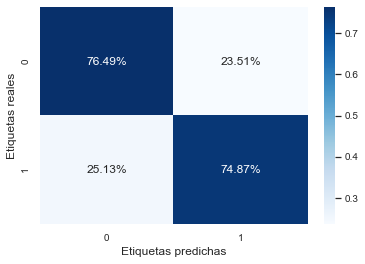

In [88]:
#Hacemos una confusion matrix para ver como fue el rendimiento
# sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, 
#             fmt='.2%', cmap='Blues')

cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%',  cmap='Blues')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## LightGBM

In [89]:
#Ahora probamos con Lightgbm
import lightgbm as lgb

In [90]:
pipeline_lgbm = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("lgbm", lgb.LGBMClassifier(class_weight="balanced"))])

In [91]:
params_lgbm = {  
    "lgbm__n_estimators": [50,100,500],      
    "lgbm__max_depth": [1,2,3,4],            
    "lgbm__learning_rate": [0.01, 0.1],
    "scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
}

In [92]:
grid_lgbm = GridSearchCV (pipeline_lgbm, param_grid=params_lgbm, cv=cv, scoring="f1_weighted", n_jobs=-1, verbose=1)

In [93]:
grid_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   25.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('pipeline-1',
                                                                        Pipeline(steps=[('columnselector',
                                                                                         ColumnSelector(columns=['CreditScore',
                                                                                                                 'Age',
                                                                                                                 'Balance',
                                                                                                                 'EstimatedSalary']))])),
                                                                       ('pipeline-2',
                                                                        Pipeline(steps

In [94]:
grid_lgbm.best_score_

0.8239535667923835

In [95]:
grid_lgbm.best_params_

{'lgbm__learning_rate': 0.1,
 'lgbm__max_depth': 4,
 'lgbm__n_estimators': 500,
 'scaler': StandardScaler()}

In [96]:
y_train_lgbm_pred = grid_lgbm.predict(X_train)

In [97]:
cf_matrix_lgbm = confusion_matrix(y_train, y_train_lgbm_pred)

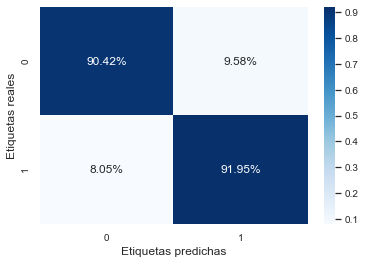

In [98]:
# sns.heatmap(cf_matrix_lgbm/np.sum(cf_matrix_lgbm, axis=1), annot=True, 
#             fmt='.2%', cmap='rocket_r')

cmn_lgbm = cf_matrix_lgbm.astype('float') / cf_matrix_lgbm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn_lgbm, annot=True, fmt='.2%',  cmap='Blues')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Se ve que maneja muy bien la clase minoritaria por lo que lo consideramos hasta ahora el mejor modelo.

In [99]:
print(classification_report(y_train, y_train_lgbm_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5972
           1       0.71      0.92      0.80      1528

    accuracy                           0.91      7500
   macro avg       0.84      0.91      0.87      7500
weighted avg       0.92      0.91      0.91      7500



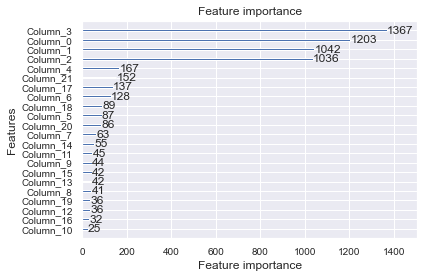

In [100]:
#Vemos la feature importance del modelo
lgb.plot_importance(grid_lgbm.best_estimator_.named_steps["lgbm"]);

Como no se distinguen las features por el nombre hay que sacarlas del dataset.

In [101]:
#Aplicamos los pipelines a X_train y lo asignamos a otro dataframe para poder ver y sacar el nombre de las columnas 

num = num_pipe.transform(X_train)
cat = cat_pipe.transform(X_train)
other = other_pipe.transform(X_train)

df_columns = pd.concat([num, cat, other], axis=1, join="inner")
df_columns.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Tenure_1', 'Tenure_2', 'Tenure_3',
       'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9',
       'Tenure_10', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4',
       'HasCrCard', 'IsActiveMember'],
      dtype='object')

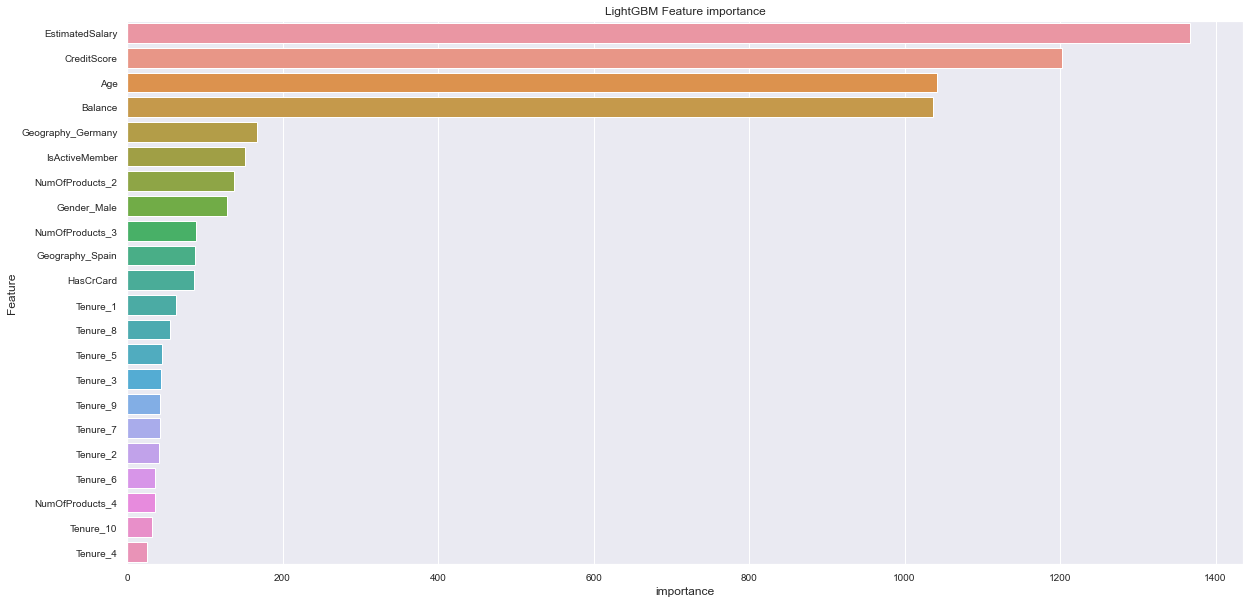

In [102]:
#Ahora ploteamos
feature_imp = pd.DataFrame(sorted(zip(grid_lgbm.best_estimator_.named_steps["lgbm"].feature_importances_,df_columns.columns)),
                           columns=['importance','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="Feature", data=feature_imp.sort_values(by="importance", ascending=False))
plt.title('LightGBM Feature importance')
plt.show()

## Dummie Classifier

In [103]:
#Vamos a hacer un baseline para ver si nuestro mejor modelo hasta ahora en verdad es el mejor
from sklearn.dummy import DummyClassifier

In [104]:
pipeline_dummie = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("dummie", DummyClassifier(strategy = 'most_frequent', random_state=1))])

In [105]:
pipeline_dummie.fit(X_train, y_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['CreditScore',
                                                                                          'Age',
                                                                                          'Balance',
                                                                                          'EstimatedSalary']))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('getdummiestransformer',
                                                                  GetDummiesTransformer(columns=['Geography',
                                                                                                 'Gender',
                                      

In [106]:
y_pred_dummy_clf = pipeline_dummie.predict(X_train)

In [107]:
cf_matrix_dc = confusion_matrix(y_train, y_pred_dummy_clf)

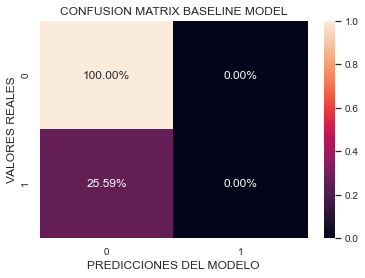

In [109]:
sns.heatmap(cf_matrix_dc/np.sum(cf_matrix_dc, axis=1), annot= True, fmt='.2%')

plt.title('CONFUSION MATRIX BASELINE MODEL')
plt.xlabel('PREDICCIONES DEL MODELO')
plt.ylabel('VALORES REALES')
plt.show()

In [110]:
print(classification_report(y_train, y_pred_dummy_clf))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5972
           1       0.00      0.00      0.00      1528

    accuracy                           0.80      7500
   macro avg       0.40      0.50      0.44      7500
weighted avg       0.63      0.80      0.71      7500



Por el weighted avg del dummie classifier se ve que el LGBM tuvo mejor performance que este modelo.

## Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [110]:
pipeline_gnb = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("gnb", GaussianNB())])

In [111]:
pipeline_gnb.fit(X_train, y_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['CreditScore',
                                                                                          'Age',
                                                                                          'Balance',
                                                                                          'EstimatedSalary']))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('getdummiestransformer',
                                                                  GetDummiesTransformer(columns=['Geography',
                                                                                                 'Gender',
                                      

In [112]:
y_pred_gnb = pipeline_gnb.predict(X_train)

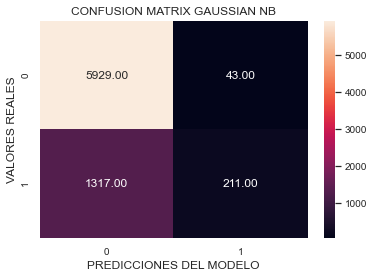

In [113]:
sns.heatmap(confusion_matrix(y_train, y_pred_gnb), annot= True, fmt='.2f')
plt.title('CONFUSION MATRIX GAUSSIAN NB')
plt.xlabel('PREDICCIONES DEL MODELO')
plt.ylabel('VALORES REALES')
plt.show()

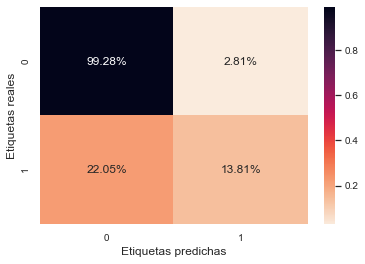

In [114]:
sns.heatmap(confusion_matrix(y_train, y_pred_gnb)/np.sum(confusion_matrix(y_train, y_pred_gnb), axis=1), annot=True, 
            fmt='.2%', cmap='rocket_r')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [115]:
print(classification_report(y_train, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      5972
           1       0.83      0.14      0.24      1528

    accuracy                           0.82      7500
   macro avg       0.82      0.57      0.57      7500
weighted avg       0.82      0.82      0.76      7500



## Multinomial Naive Bayes

In [116]:
pipeline_multi_nb = Pipeline([("union", union),
                          ("scaler", MinMaxScaler()),
                    ("mnb", MultinomialNB())])

In [117]:
pipeline_multi_nb.fit(X_train, y_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['CreditScore',
                                                                                          'Age',
                                                                                          'Balance',
                                                                                          'EstimatedSalary']))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('getdummiestransformer',
                                                                  GetDummiesTransformer(columns=['Geography',
                                                                                                 'Gender',
                                      

In [118]:
y_pred_multi_nb = pipeline_multi_nb.predict(X_train)

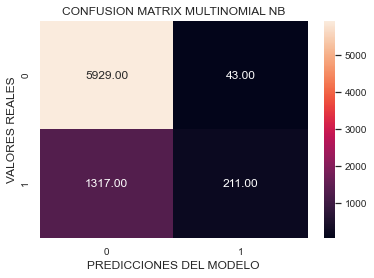

In [119]:
sns.heatmap(confusion_matrix(y_train, y_pred_multi_nb), annot= True, fmt='.2f')
plt.title('CONFUSION MATRIX MULTINOMIAL NB')
plt.xlabel('PREDICCIONES DEL MODELO')
plt.ylabel('VALORES REALES')
plt.show()

In [120]:
print(classification_report(y_train, y_pred_multi_nb))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      5972
           1       0.83      0.14      0.24      1528

    accuracy                           0.82      7500
   macro avg       0.82      0.57      0.57      7500
weighted avg       0.82      0.82      0.76      7500



## XGBoost

In [111]:
#Probamos con XGboost
from xgboost.sklearn import XGBClassifier

In [112]:
pipeline_xgb = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("xgb", XGBClassifier(n_jobs=-1, use_label_encoder=False))])

In [113]:
params_xgb = {  
    "xgb__n_estimators": [50,100,500],     
    "xgb__max_depth": [1,2,3,4],            
    "xgb__learning_rate": [0.01, 0.1],
    "xgb__max_delta_step": [0, 1, 2]
}

In [114]:
grid_xgb = GridSearchCV (pipeline_xgb, param_grid=params_xgb, cv=cv, scoring="f1_weighted", n_jobs=-1, verbose=1)

In [115]:
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.1min finished


[08:44:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('pipeline-1',
                                                                        Pipeline(steps=[('columnselector',
                                                                                         ColumnSelector(columns=['CreditScore',
                                                                                                                 'Age',
                                                                                                                 'Balance',
                                                                                                                 'EstimatedSalary']))])),
                                                                       ('pipeline-2',
                                                                        Pipeline(steps

In [116]:
grid_xgb.best_score_

0.8524496697835454

In [117]:
grid_xgb.best_params_

{'xgb__learning_rate': 0.1,
 'xgb__max_delta_step': 0,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 500}

In [118]:
y_train_xgb_pred = grid_xgb.predict(X_train)
cf_matrix_xgb = confusion_matrix(y_train, y_train_xgb_pred)

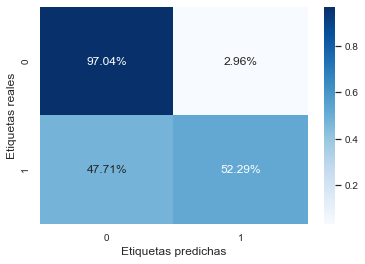

In [119]:
# sns.heatmap(cf_matrix_xgb/np.sum(cf_matrix_xgb, axis=1), annot=True, 
#             fmt='.2%', cmap='rocket_r')

cmn_xgb = cf_matrix_xgb.astype('float') / cf_matrix_xgb.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn_xgb, annot=True, fmt='.2%',  cmap='Blues')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

No maneja muy bien la clase minoritaria.

In [120]:
print(classification_report(y_train, y_train_xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5972
           1       0.82      0.52      0.64      1528

    accuracy                           0.88      7500
   macro avg       0.85      0.75      0.78      7500
weighted avg       0.87      0.88      0.87      7500



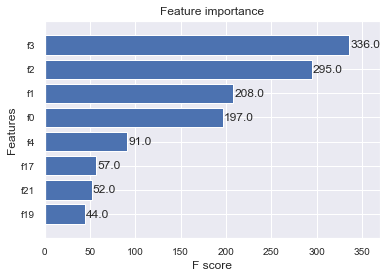

In [121]:
from xgboost import plot_importance
plot_importance(grid_xgb.best_estimator_.named_steps["xgb"], height = 0.8, max_num_features=8);

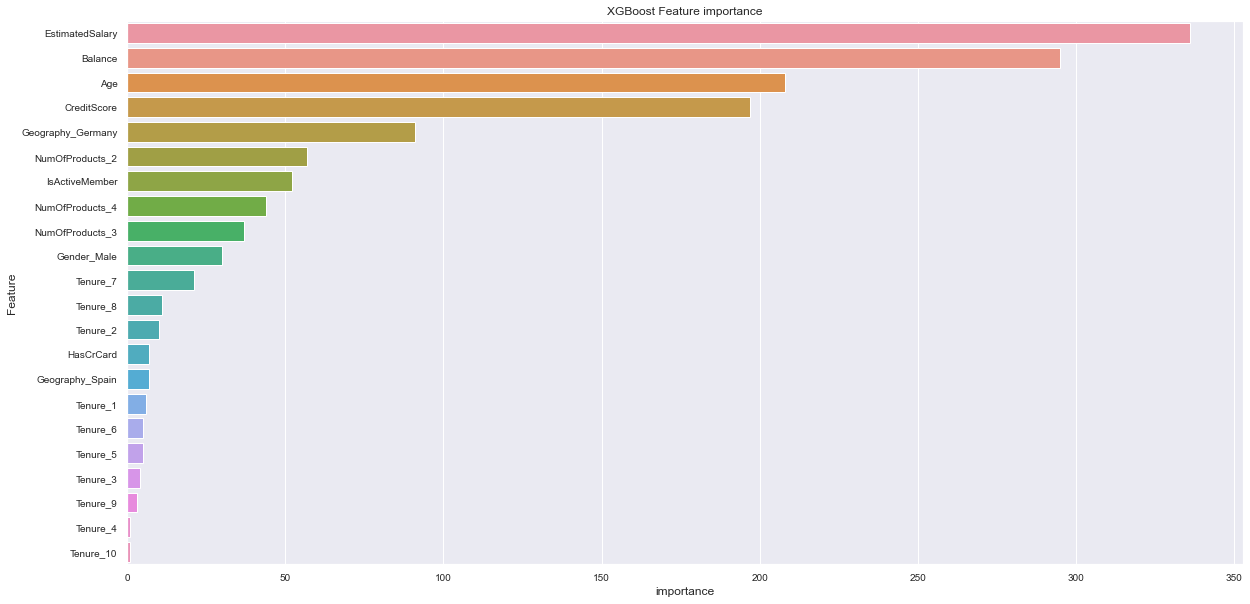

In [122]:
feature_imp_xgb = pd.DataFrame(sorted(zip(grid_xgb.best_estimator_.named_steps["xgb"].get_booster().get_fscore().values(),
                                          df_columns.columns)),
                           columns=['importance','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="Feature", data=feature_imp_xgb.sort_values(by="importance", ascending=False))
plt.title('XGBoost Feature importance')
plt.show()

Por el analisis de feature importance se ve que para los dos modelos las feature mas importantes son "EstimatedSalary", "Balance", "Age" y "CreditScore" en diferente orden, siendo siempre primero "EstimatedSalary" (sin tener en cuenta las dummies que aparecen).

## RFECV

In [133]:
#Probamos RFECV para ver como interpreta las features
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()

In [134]:
pipeline_rfecv = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("rfecv", RFECV(estimator, cv=cv, step = 1))])

In [135]:
pipeline_rfecv.fit(X_train, y_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['CreditScore',
                                                                                          'Age',
                                                                                          'Balance',
                                                                                          'EstimatedSalary']))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('getdummiestransformer',
                                                                  GetDummiesTransformer(columns=['Geography',
                                                                                                 'Gender',
                                      

In [136]:
rfecv = pipeline_rfecv.named_steps["rfecv"]

In [137]:
scores = pd.DataFrame()
scores["Attribute Name"] = df_columns.columns; scores["Ranking"] = rfecv.ranking_; scores["Support"] = rfecv.support_

print(scores.sort_values('Ranking'))

       Attribute Name  Ranking  Support
0         CreditScore        1     True
19    NumOfProducts_4        1     True
18    NumOfProducts_3        1     True
17    NumOfProducts_2        1     True
20          HasCrCard        1     True
7            Tenure_1        1     True
21     IsActiveMember        1     True
5     Geography_Spain        1     True
4   Geography_Germany        1     True
3     EstimatedSalary        1     True
2             Balance        1     True
1                 Age        1     True
6         Gender_Male        1     True
14           Tenure_8        2    False
10           Tenure_4        3    False
8            Tenure_2        4    False
9            Tenure_3        5    False
11           Tenure_5        6    False
16          Tenure_10        7    False
15           Tenure_9        8    False
12           Tenure_6        9    False
13           Tenure_7       10    False


Al igual que con las feature importance de los modelos el RFECV tambien considera importante el "CreditScore".

## LIME

In [138]:
#Promamos que pasa con las features con LIME
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

In [139]:
pipeline_rf = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(n_estimators=500, random_state=150))])

In [140]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['CreditScore',
                                                                                          'Age',
                                                                                          'Balance',
                                                                                          'EstimatedSalary']))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('getdummiestransformer',
                                                                  GetDummiesTransformer(columns=['Geography',
                                                                                                 'Gender',
                                      

In [141]:
explainer = LimeTabularExplainer(union.transform(X_train), 
                                 mode = "classification",
                                 training_labels = y_train,
                                 feature_names = df_columns.columns, 
                                 categorical_features  = list(range(4,22)),
                                 discretize_continuous=True,
                                discretizer = 'decile')

In [142]:
#Vemos con random forest
i = 150

data_row = union.transform(X_train)[i]
explanation = explainer.explain_instance(data_row, pipeline_rf.named_steps["rf"].predict_proba, num_features=len(data_row))

In [143]:
explanation.show_in_notebook(show_table=True)

In [144]:
#Vemos con el mejor modelo
i = 150

data_row = union.transform(X_train)[i]
explanation = explainer.explain_instance(data_row, grid_lgbm.best_estimator_.named_steps["lgbm"].predict_proba,
                                         num_features=len(data_row))

explanation.show_in_notebook(show_table=True)

## Vemos si podemos mejorar el mejor modelo

In [123]:
pipeline_lgbm2 = Pipeline([("union", union),
                          ("scaler", StandardScaler()),
                    ("lgbm", lgb.LGBMClassifier(class_weight="balanced", n_estimators=500, max_depth=4,
                                               learning_rate=0.1))])

In [124]:
#Tuneamos un poco más los hiperparametros para ver si mejora sin llegar al overfitting

params_lgbm2 = {  
    "lgbm__num_leaves": [16, 31, 47],      
    "lgbm__min_child_samples": [10, 20, 30],            
    "lgbm__boosting_type": ["gbdt", "rf"]
}

In [125]:
grid_lgbm2 = GridSearchCV (pipeline_lgbm2, param_grid=params_lgbm2, cv=cv, scoring="f1_weighted", n_jobs=-1, verbose=1)

In [126]:
grid_lgbm2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('pipeline-1',
                                                                        Pipeline(steps=[('columnselector',
                                                                                         ColumnSelector(columns=['CreditScore',
                                                                                                                 'Age',
                                                                                                                 'Balance',
                                                                                                                 'EstimatedSalary']))])),
                                                                       ('pipeline-2',
                                                                        Pipeline(steps

In [127]:
grid_lgbm2.best_params_

{'lgbm__boosting_type': 'gbdt',
 'lgbm__min_child_samples': 10,
 'lgbm__num_leaves': 16}

In [128]:
grid_lgbm2.best_score_

0.8242102918275629

In [129]:
y_train_lgbm2_pred = grid_lgbm2.best_estimator_.predict(X_train)
cf_matrix_lgbm2 = confusion_matrix(y_train, y_train_lgbm2_pred)

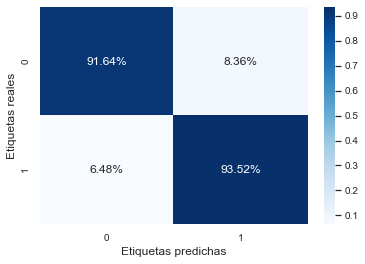

In [130]:
# sns.heatmap(cf_matrix_lgbm2/np.sum(cf_matrix_lgbm2, axis=1), annot=True, 
#             fmt='.2%', cmap='rocket_r')

cmn_lgbm2 = cf_matrix_lgbm2.astype('float') / cf_matrix_lgbm2.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn_lgbm2, annot=True, fmt='.2%',  cmap='Blues')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Vemos que el modelo mejoró un poco en predecir la clase positiva, lo que lo convierte en el mejor modelo.

In [131]:
print(classification_report(y_train, y_train_lgbm2_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5972
           1       0.74      0.94      0.83      1528

    accuracy                           0.92      7500
   macro avg       0.86      0.93      0.89      7500
weighted avg       0.93      0.92      0.92      7500



In [132]:
#Ya que fue el mejor vamos a hacer una predicion con X_test
y_pred = grid_lgbm2.best_estimator_.predict(X_test)
cf_matrix_lgbm2_pred = confusion_matrix(y_test, y_pred)

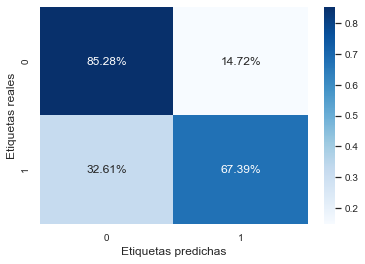

In [133]:
# sns.heatmap(cf_matrix_lgbm2_pred/np.sum(cf_matrix_lgbm2_pred, axis=1), annot=True, 
#             fmt='.2%', cmap='rocket_r')

cmn_lgbm2_pred = cf_matrix_lgbm2_pred.astype('float') / cf_matrix_lgbm2_pred.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn_lgbm2_pred, annot=True, fmt='.2%',  cmap='Blues')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1991
           1       0.54      0.67      0.60       509

    accuracy                           0.82      2500
   macro avg       0.73      0.76      0.74      2500
weighted avg       0.84      0.82      0.82      2500



## Serialización de modelo con Pickle

In [294]:
#Ahora serializamos nuestro mejor modelo
import pickle

In [295]:
with open('bank_model.pkl', 'wb') as f_bank:
    pickle.dump(grid_lgbm2, f_bank)

In [296]:
#Lo abrimos para comprobar que se guardó bien
with open('./bank_model.pkl', 'rb') as f_bank:
        modelo_banco = pickle.load(f_bank)

In [297]:
modelo_banco.best_params_ #Llamo al metodo best_params_ de GridSearch para verificar que es el mismo modelo

{'lgbm__boosting_type': 'gbdt',
 'lgbm__min_child_samples': 20,
 'lgbm__num_leaves': 16}